Trying to reproduce some plots from <a href="https://doi.org/10.1175/1520-0450(1990)029%3C0652:OTASOF%3E2.0.CO;2">Byun 1990</a> provides a simple way to test this implementation.

In [1]:
import sys
sys.path.append('../py/lib/python2.7/site-packages')
import land
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Set up default values
args = dict()
args['rho'] = 1e0
args['grav'] = 9.81e0
args['c_p'] = 1004e0
args['L_v'] = 2.26e6
args['theta_s'] = 300e0
args['theta_atm'] = 295e0
args['qstar_s'] = 6.06e-3
args['q_atm'] = 3e-3
args['u_atm'] = 1e0
args['v_atm'] = 2e0
args['u_min'] = 1e0
args['phi'] = 0.37e0
args['phi_fc'] = 0.37e0
args['phi_pwp'] = 0.185e0
args['r_sfc'] = 1e0
args['z_atm'] = 50e0
args['z_0'] = 1e0

In [32]:
z_0s = [1e0, 1./4., 1./12., 1./20., 1./200.]
M = len(z_0s)
N = 1000
C_d = np.zeros([M,N])
C_k = np.zeros([M,N])
Ri_b = np.zeros([M,N])
zeta = np.zeros([M,N])
for jj, z_0 in enumerate(z_0s):
    args['z_0'] = z_0
    for ii, theta in enumerate(np.linspace(295e0, 305e0, N)):
        args['theta_atm'] = theta
        shf, lhf, taux, tauy, C_k_out, C_d_out, zeta_out, Ri_b_out = land.land_flux(args)
        C_d[jj,ii] = C_d_out
        C_k[jj,ii] = C_k_out
        Ri_b[jj,ii] = Ri_b_out
        zeta[jj,ii] = zeta_out / \
            (args['z_atm'] / (args['z_atm'] - args['z_0']) * np.log(args['z_atm'] / args['z_0']))

Compare with Fig. 1:

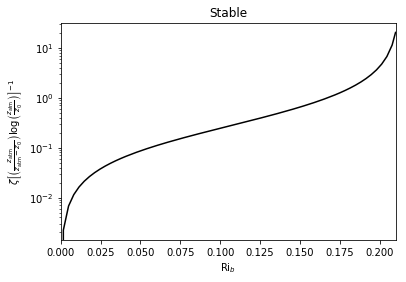

In [33]:
plt.figure()
plt.plot(Ri_b[0,:], zeta[0,:], 'k')
plt.gca().set_yscale('log')
plt.xlim([0, max(Ri_b[0,:])])
plt.ylabel(r'$\zeta \left [\left(\frac{z_{\mathrm{atm}}}{z_{\mathrm{atm}} - z_0}\right)' +
           r'\log \left ( \frac{z_{\mathrm{atm}}}{z_0} \right ) \right]^{-1}$')
plt.xlabel(r'Ri$_b$')
plt.title('Stable')

Compare with Fig. 2:

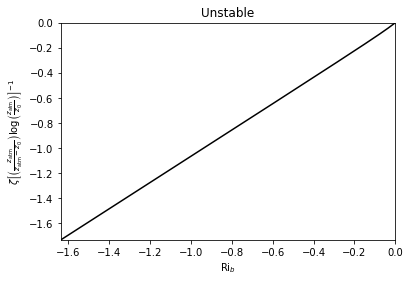

In [34]:
plt.figure()
plt.plot(Ri_b[0,:], zeta[0,:], 'k-')
plt.xlim([min(Ri_b[0,:]), 0])
plt.ylim([min(zeta[0,:]), 0])
plt.ylabel(r'$\zeta \left [\left(\frac{z_{\mathrm{atm}}}{z_{\mathrm{atm}} - z_0}\right)' +
           r'\log \left ( \frac{z_{\mathrm{atm}}}{z_0} \right ) \right]^{-1}$')
plt.xlabel(r'Ri$_b$')
plt.title('Unstable')

Compare with Fig. 4(a)

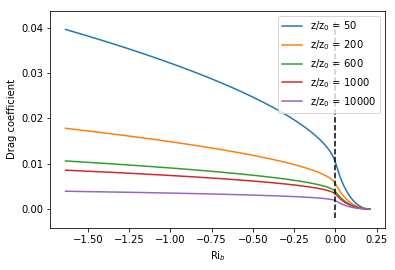

In [35]:
plt.figure()
for jj in range(M):
    plt.plot(Ri_b[jj,:], C_d[jj,:], '-', label = 'z/z$_0$ = %d' % (args['z_atm']/z_0s[jj]))
ymin, ymax = plt.gca().get_ylim()
plt.plot([0, 0], [ymin, ymax], 'k--')
plt.ylabel('Drag coefficient')
plt.xlabel(r'Ri$_b$')
plt.legend()

Compare with Fig. 4(b)

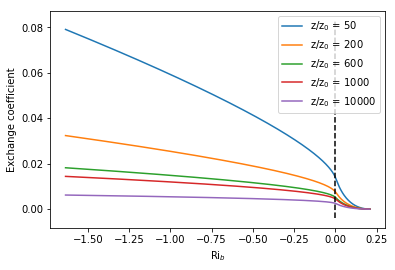

In [36]:
plt.figure()
for jj in range(M):
    plt.plot(Ri_b[jj,:], C_k[jj,:], '-', label = 'z/z$_0$ = %d' % (args['z_atm']/z_0s[jj]))
ymin, ymax = plt.gca().get_ylim()
plt.plot([0, 0], [ymin, ymax], 'k--')
plt.ylabel('Exchange coefficient')
plt.xlabel(r'Ri$_b$')
plt.legend()